In [127]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelBinarizer

In [136]:
train = np.loadtxt('iris/iris-train.txt')
test = np.loadtxt('iris/iris-test.txt')
XTrain = np.append(train[:,1:],np.ones((train.shape[0],1)),axis=1)
yTrain = train[:,0]
TTrain = LabelBinarizer().fit_transform(yTrain).T
XTest = np.append(test[:,1:],np.ones((test.shape[0],1)),axis=1)
yTest = test[:,0]
TTest = LabelBinarizer().fit_transform(yTest).T
print("XTrain:",XTrain.shape)
print("XTest:",XTest.shape)
print("TTrain:",TTrain.shape)
print("TTest:",TTest.shape)

XTrain: (90, 3)
XTest: (51, 3)
TTrain: (3, 90)
TTest: (3, 51)


In [129]:
# def musicMSE(pred, gt):
#     mse = (np.square(np.rint(pred)-gt)).mean()
#     return mse
# print(musicMSE(np.zeros(3),np.ones(3)))

In [137]:
def P(X,W): #will be kxn (3 classes by n examples)
    mat = np.matmul(W.T,X)
    num = np.exp(mat-np.max(mat))
    return num/np.sum(num,axis=0)

In [150]:
def gradient_descent(XTrain,TTrain,XTest,TTest,alpha,lr,epochs=100,momentum=0,batch_size = 128):
    W = np.zeros((TTrain.shape[0],XTrain.shape[1]))
    dW = np.zeros((TTrain.shape[0],XTrain.shape[1]))
    nTrain, featCount = XTrain.shape
    nTest = XTest.shape[0]

    def P(X,W): #will be nxk (3 classes by n examples)
        mat = np.matmul(X,W)
        num = np.exp(np.exp(mat-np.max(mat)))
        return num/np.sum(num,axis=0) 
    def getgrad(X,T,W):
        return alpha*W + (np.matmul((P(X,W).T-T),X))
    def getlosses(XTrain,XTest,TTrain,TTest,W):
        train_loss = -np.sum(np.matmul(TTrain,np.log(P(XTrain,W))))/nTrain
        test_loss = -np.sum(np.matmul(TTest,np.log(P(XTest,W))))/nTest
        return train_loss,test_loss
    def getaccuracies(X,T,W):
        guesses = np.argmax(P(X,W),axis=1)
        truths = np.argmax(T,axis=0)
        acc = 0
        for i in range(len(guesses)):
            if guesses[i] == truths[i]:
                acc+=1
        return acc/len(guesses)
    XTrain2 = np.copy(XTrain)
    XTrain2[:,:-1] = 2*(XTrain2[:,:-1]-0.5)
    XTest2 = np.copy(XTest)
    XTest2[:,:-1] = 2*(XTest2[:,:-1]-0.5)
    TTrain2 = np.copy(TTrain)
    TTest2 = np.copy(TTest)
    test_losses = []
    train_losses = []
    test_accuracies = []
    train_accuracies = []
    for i in range(epochs):
        #shuffle train data:
        p = random.permutation(XTrain2.shape[0])
        XTrain2 = XTrain2[p]
        TTrain2 = TTrain2[:,p]
        for b in range(math.ceil(XTrain2.shape[0]/batch_size)):
            if(batch_size*(b+1) < XTrain2.shape[0]):
                batchXTrain = np.copy(XTrain2[batch_size*b:batch_size*(b+1)])
                batchTTrain = np.copy(TTrain2[:,batch_size*b:batch_size*(b+1)])
            else:
                batchXTrain = np.copy(XTrain2[batch_size*b:-1])
                batchTTrain = np.copy(TTrain2[:,batch_size*b:-1])
            grad = getgrad(batchXTrain,batchTTrain,W)
            # print("train:",batchTTrain[:,:5])
            # print("Grad:",grad)
            dW = lr*dW + grad
            # print("dW:",dW)
            W -= dW
            # print("W:",W)
            # print(W)
        train_loss,test_loss = getlosses(XTrain2,XTest2,TTrain2,TTest2,W)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accuracies.append(getaccuracies(XTrain2,TTrain2,W))
        test_accuracies.append(getaccuracies(XTest2,TTest2,W))
        print("Epoch",i,"- Train Loss:",train_loss,"\t Test Loss: ",test_loss)

    return(W,train_losses,test_losses,train_accuracies,test_accuracies)
    # return(w,train_losses,test_losses)



In [152]:
softMax = gradient_descent(XTrain,TTrain,XTest,TTest,
                         alpha = .0001,
                         lr = .0001,
                         epochs = 40,
                         batch_size = 8)

Epoch 0 - Train Loss: 13.507228232810299 	 Test Loss:  11.813481817814706
Epoch 1 - Train Loss: 13.507229604987558 	 Test Loss:  11.81035954004008
Epoch 2 - Train Loss: 13.507229940537892 	 Test Loss:  11.809371800584762
Epoch 3 - Train Loss: 13.507229953933555 	 Test Loss:  11.809134937957097
Epoch 4 - Train Loss: 13.507229954547554 	 Test Loss:  11.809015268624881
Epoch 5 - Train Loss: 13.507229954572024 	 Test Loss:  11.808998593983143
Epoch 6 - Train Loss: 13.507229954573148 	 Test Loss:  11.808994721034527
Epoch 7 - Train Loss: 13.507229954573196 	 Test Loss:  11.808996566153507
Epoch 8 - Train Loss: 13.507229954573202 	 Test Loss:  11.808999898177623
Epoch 9 - Train Loss: 13.507229954573202 	 Test Loss:  11.809002341747883
Epoch 10 - Train Loss: 13.507229954573202 	 Test Loss:  11.809003383640961
Epoch 11 - Train Loss: 13.507229954573202 	 Test Loss:  11.80900443349678
Epoch 12 - Train Loss: 13.507229954573202 	 Test Loss:  11.809005020603852
Epoch 13 - Train Loss: 13.50722995457

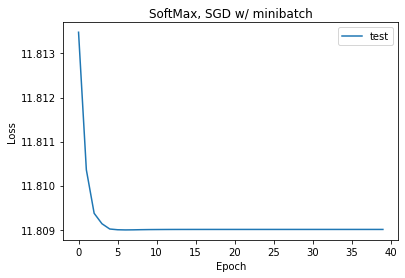

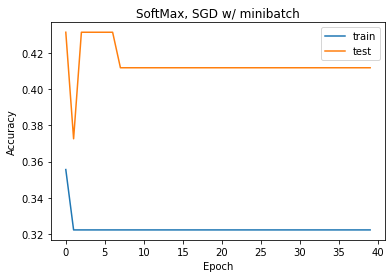

(3, 3)
[[ 364.92446511 -578.51487393  693.33941489]
 [ 475.16917902   67.92955186  687.39209857]
 [ 487.08260477  271.09357573  689.34584208]]


In [157]:
# losses = np.array(losses)
start = 0
stop = 40
# plt.plot(range(start,stop),softMax[1][start:stop])
plt.plot(range(start,stop),softMax[2][start:stop])
plt.legend(["test"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("SoftMax, SGD w/ minibatch")
plt.show()
plt.plot(range(start,stop),softMax[3][start:stop])
plt.plot(range(start,stop),softMax[4][start:stop])
plt.legend(["train","test"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("SoftMax, SGD w/ minibatch")
plt.show()
print(softMax[0].shape)
print(softMax[0])
# print(P(XTest,softMax[0]))


In [134]:
count = gradient_descent(trainFeat,trainYears,testFeat,testYears,
                         alpha = .0005,
                         lr = .0005,
                         type = "count",
                         epochs = 40,
                         batch_size = 1024)

NameError: name 'trainFeat' is not defined

In [ ]:
print(musicMSE(predict(testFeat,ridge),testYears))
print(musicMSE(predict(testFeat,ridge),testYears))
print(musicMSE(predict(testFeat,lasso),testYears))
print(musicMSE(predict(testFeat,count),testYears))

# def errorVec(pred, gt):
#     mse = (np.square(np.rint(pred)-gt))
#     return mse
# print(errorVec(testYears,predict(testFeat,ridge)))

115.57932250004842
115.57932250004842
119.13089035656873
9417.940888226065
